In [1]:
"""
TO-DO:
Conduct the studies:
- Why % of Primary completion rate might be > 100?
- And Trade % of GDP?
- Can GNI per Capita differs so much?
- Are outliers in our region reflect the real situation or data could be corrupted?
- Are there parliaments exist in all countries of our region?
Think:
- Which features are similar and can be joined into one and do we need to join them. 
- Outliers - what are we going to do with them and why?
- Is it make sense to replace some missing data with mean, not median? Which ones? Why?
""";

In [2]:
# !pip install missingno

In [3]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score as r2
import random as rand

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = 50

%matplotlib inline


In [4]:
# Storing the path to the dataset
file = "./dataset/Final_Project_Dataset.xlsx"

# Reading the file into Python through pandas
dataset = pd.read_excel(io         = file,       # file to be read in
                        sheet_name = 'Data',     # sheet name in Excel
                        header     = 0)          # row # with feature labels


In [5]:
# Checking first rows
dataset.head(n = 5).round(decimals = 2)


,Country Code Total,Country Name,Hult Region,Cool Name,AIDS estimated deaths (UNAIDS estimates),"Adjusted net enrollment rate, primary (% of primary school age children)","Adolescent fertility rate (births per 1,000 women ages 15-19)",Antiretroviral therapy coverage (% of people living with HIV),Births attended by skilled health staff (% of total),CO2 emissions (metric tons per capita),"Contributing family workers, female (% of female employment)","Contributing family workers, male (% of male employment)","Contributing family workers, total (% of total employment)","Employment to population ratio, 15+, female (%) (modeled ILO estimate)","Employment to population ratio, 15+, male (%) (modeled ILO estimate)","Employment to population ratio, 15+, total (%) (modeled ILO estimate)","Energy use (kg of oil equivalent) per $1,000 GDP (constant 2011 PPP)","Fertility rate, total (births per woman)",GDP per person employed (constant 2011 PPP $),GDP per unit of energy use (constant 2011 PPP $ per kg of oil equivalent),"GNI per capita, Atlas method (current US$)","Immunization, measles (% of children ages 12-23 months)",Improved sanitation facilities (% of population with access),Improved water source (% of population with access),"Incidence of tuberculosis (per 100,000 people)",Income share held by lowest 20%,Internet users (per 100 people),"Life expectancy at birth, total (years)","Literacy rate, adult total (% of people ages 15 and above)","Maternal mortality ratio (modeled estimate, per 100,000 live births)",Mobile cellular subscriptions (per 100 people),"Mortality rate, infant (per 1,000 live births)",Net ODA received per capita (current US$),"Population, total",Poverty gap at national poverty lines (%),Pregnant women receiving prenatal care (%),"Prevalence of HIV, total (% of population ages 15-49)",Prevalence of undernourishment (% of population),"Primary completion rate, total (% of relevant age group)",Proportion of seats held by women in national parliaments (%),Reported cases of malaria,"School enrollment, primary (% net)","Self-employed, total (% of total employment)",Trade (% of GDP),"Tuberculosis death rate (per 100,000 people), including HIV"
0,ABW,Aruba,Carribean Islands & Parts of Latin America,Ratchet,NaN,99.10,32.79,NaN,NaN,26.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.76,NaN,NaN,NaN,NaN,97.8,96.8,11.0,NaN,52.00,74.72,NaN,NaN,119.19,NaN,NaN,101353,NaN,NaN,NaN,NaN,95.13,NaN,NaN,99.06,NaN,141.19,0.89
1,AFG,Afghanistan,Middle East & Russia,Mirage,NaN,NaN,111.14,NaN,24.0,0.15,64.24,23.49,28.86,12.92,79.79,47.43,NaN,6.25,5276.73,NaN,360.0,59.0,28.0,44.4,189.0,NaN,1.84,60.24,NaN,676.0,28.94,70.6,178.60,27294031,NaN,36.0,NaN,24.6,NaN,27.7,81574.0,NaN,72.32,73.07,40.00
2,AGO,Angola,Sub-Saharan Africa,Sideswipe,9200.0,74.89,178.18,6.0,NaN,1.18,15.12,11.88,13.48,63.49,69.60,66.45,82.05,6.31,17090.73,12.19,2760.0,57.0,43.3,46.6,382.0,5.4,1.90,56.19,NaN,606.0,31.13,86.4,16.96,21759420,12.7,NaN,1.6,23.7,39.27,37.3,1377992.0,74.89,71.97,127.54,69.00
3,ALB,Albania,Eastern Europe,Skids & Mudflap,100.0,87.15,18.91,14.0,NaN,1.48,48.59,14.10,28.78,40.38,55.51,47.87,77.65,1.65,24757.50,12.88,3950.0,98.0,89.6,95.8,16.0,8.9,23.86,75.94,95.94,30.0,62.16,12.3,123.79,2947314,2.3,NaN,0.1,9.7,92.83,7.1,NaN,87.15,59.30,77.45,0.70
4,AND,Andorra,Eastern Europe,Skids & Mudflap,NaN,NaN,NaN,NaN,NaN,6.43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.25,NaN,NaN,NaN,98.0,100.0,100.0,5.5,NaN,70.04,NaN,NaN,NaN,76.56,3.9,NaN,83861,NaN,NaN,NaN,NaN,NaN,25.0,NaN,NaN,NaN,NaN,NaN


In [6]:
# Checking last rows
dataset.tail(n = 5).round(decimals = 2)


,Country Code Total,Country Name,Hult Region,Cool Name,AIDS estimated deaths (UNAIDS estimates),"Adjusted net enrollment rate, primary (% of primary school age children)","Adolescent fertility rate (births per 1,000 women ages 15-19)",Antiretroviral therapy coverage (% of people living with HIV),Births attended by skilled health staff (% of total),CO2 emissions (metric tons per capita),"Contributing family workers, female (% of female employment)","Contributing family workers, male (% of male employment)","Contributing family workers, total (% of total employment)","Employment to population ratio, 15+, female (%) (modeled ILO estimate)","Employment to population ratio, 15+, male (%) (modeled ILO estimate)","Employment to population ratio, 15+, total (%) (modeled ILO estimate)","Energy use (kg of oil equivalent) per $1,000 GDP (constant 2011 PPP)","Fertility rate, total (births per woman)",GDP per person employed (constant 2011 PPP $),GDP per unit of energy use (constant 2011 PPP $ per kg of oil equivalent),"GNI per capita, Atlas method (current US$)","Immunization, measles (% of children ages 12-23 months)",Improved sanitation facilities (% of population with access),Improved water source (% of population with access),"Incidence of tuberculosis (per 100,000 people)",Income share held by lowest 20%,Internet users (per 100 people),"Life expectancy at birth, total (years)","Literacy rate, adult total (% of people ages 15 and above)","Maternal mortality ratio (modeled estimate, per 100,000 live births)",Mobile cellular subscriptions (per 100 people),"Mortality rate, infant (per 1,000 live births)",Net ODA received per capita (current US$),"Population, total",Poverty gap at national poverty lines (%),Pregnant women receiving prenatal care (%),"Prevalence of HIV, total (% of population ages 15-49)",Prevalence of undernourishment (% of population),"Primary completion rate, total (% of relevant age group)",Proportion of seats held by women in national parliaments (%),Reported cases of malaria,"School enrollment, primary (% net)","Self-employed, total (% of total employment)",Trade (% of GDP),"Tuberculosis death rate (per 100,000 people), including HIV"
212,XKX,Kosovo,Eastern Europe,Skids & Mudflap,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,168.47,2.38,NaN,5.94,3100.0,NaN,NaN,NaN,NaN,NaN,NaN,69.40,NaN,NaN,32.30,NaN,NaN,1747383,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.91,NaN
213,YEM,"Yemen, Rep.",Arabian Peninsula,Wheeljack,NaN,75.99,74.81,NaN,NaN,1.00,28.73,9.11,11.13,7.09,61.53,34.40,77.00,4.94,21828.93,12.99,990.0,69.0,52.0,54.3,60.0,NaN,6.89,62.89,NaN,417.0,28.83,47.2,19.19,22356391,NaN,NaN,NaN,27.1,62.40,0.3,44206.0,75.63,42.11,81.24,11.0
214,ZAF,South Africa,East/South Africa,Jazz,240000.0,NaN,56.61,12.0,94.3,9.85,1.45,0.42,0.86,35.55,51.46,43.27,242.97,2.62,40086.35,4.12,5910.0,67.0,62.3,90.3,977.0,2.6,8.43,53.72,NaN,138.0,89.26,44.8,22.12,50412129,NaN,97.1,17.6,4.4,NaN,33.0,7796.0,NaN,15.91,72.87,53.0
215,ZMB,Zambia,East/South Africa,Jazz,39000.0,90.06,112.37,26.0,NaN,0.17,55.28,18.88,36.05,66.09,77.43,71.63,205.58,5.56,7587.20,4.86,1160.0,87.0,42.4,59.8,534.0,NaN,5.55,53.75,NaN,289.0,27.05,57.9,85.21,13082517,NaN,NaN,12.4,53.0,88.91,15.2,NaN,90.06,80.13,59.45,32.0
216,ZWE,Zimbabwe,East/South Africa,Jazz,88000.0,NaN,116.09,12.0,NaN,0.57,9.17,7.73,8.43,73.19,84.48,78.57,544.28,4.01,2630.59,1.84,300.0,70.0,38.1,78.2,487.0,NaN,3.50,49.34,NaN,533.0,12.20,59.1,45.19,13558469,NaN,NaN,15.8,36.0,NaN,15.2,32788.0,NaN,72.56,109.52,25.0


In [7]:
# Checking dataset info
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 45 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Country Code Total                                                         217 non-null    object 
 1   Country Name                                                               217 non-null    object 
 2   Hult Region                                                                217 non-null    object 
 3   Cool Name                                                                  217 non-null    object 
 4   AIDS estimated deaths (UNAIDS estimates)                                   132 non-null    float64
 5   Adjusted net enrollment rate, primary (% of primary school age children)   131 non-null    float64
 6   Adolescent fertility rate (births per 1,000 women ages 15-

In [8]:
# Checking dataset statistics
dataset.describe(include = ['number']).round(decimals = 2)


,AIDS estimated deaths (UNAIDS estimates),"Adjusted net enrollment rate, primary (% of primary school age children)","Adolescent fertility rate (births per 1,000 women ages 15-19)",Antiretroviral therapy coverage (% of people living with HIV),Births attended by skilled health staff (% of total),CO2 emissions (metric tons per capita),"Contributing family workers, female (% of female employment)","Contributing family workers, male (% of male employment)","Contributing family workers, total (% of total employment)","Employment to population ratio, 15+, female (%) (modeled ILO estimate)","Employment to population ratio, 15+, male (%) (modeled ILO estimate)","Employment to population ratio, 15+, total (%) (modeled ILO estimate)","Energy use (kg of oil equivalent) per $1,000 GDP (constant 2011 PPP)","Fertility rate, total (births per woman)",GDP per person employed (constant 2011 PPP $),GDP per unit of energy use (constant 2011 PPP $ per kg of oil equivalent),"GNI per capita, Atlas method (current US$)","Immunization, measles (% of children ages 12-23 months)",Improved sanitation facilities (% of population with access),Improved water source (% of population with access),"Incidence of tuberculosis (per 100,000 people)",Income share held by lowest 20%,Internet users (per 100 people),"Life expectancy at birth, total (years)","Literacy rate, adult total (% of people ages 15 and above)","Maternal mortality ratio (modeled estimate, per 100,000 live births)",Mobile cellular subscriptions (per 100 people),"Mortality rate, infant (per 1,000 live births)",Net ODA received per capita (current US$),"Population, total",Poverty gap at national poverty lines (%),Pregnant women receiving prenatal care (%),"Prevalence of HIV, total (% of population ages 15-49)",Prevalence of undernourishment (% of population),"Primary completion rate, total (% of relevant age group)",Proportion of seats held by women in national parliaments (%),Reported cases of malaria,"School enrollment, primary (% net)","Self-employed, total (% of total employment)",Trade (% of GDP),"Tuberculosis death rate (per 100,000 people), including HIV"
count,132.00,131.00,194.00,136.00,102.00,204.00,187.00,187.00,187.00,187.00,187.00,187.00,137.00,202.00,184.00,137.00,193.0,192.00,197.00,197.00,207.00,70.00,203.00,201.00,32.00,184.00,202.00,194.00,144.00,2.170000e+02,21.00,47.00,137.00,172.00,131.00,180.00,93.00,131.00,187.00,190.00,197.00
mean,24902.50,90.33,54.79,22.27,91.36,5.05,15.47,7.35,10.46,47.01,68.71,58.00,147.17,2.96,40128.65,8.75,14375.7,86.81,71.55,86.62,133.84,6.75,28.53,69.70,81.12,206.60,75.04,29.55,150.74,6.225548e+07,12.19,91.46,2.07,12.36,86.76,17.53,152223.83,88.83,42.18,100.64,16.50
std,150974.24,12.46,44.83,18.62,17.01,6.58,18.58,9.25,12.47,16.00,10.00,11.41,98.99,1.54,40236.81,3.71,24300.8,14.00,29.51,16.18,192.91,2.07,26.21,8.97,18.54,279.79,43.04,26.33,363.92,4.740746e+08,11.85,13.38,4.46,11.41,18.93,10.23,334071.03,12.16,26.23,77.98,22.84
min,100.00,42.74,0.57,1.00,24.00,0.02,0.01,0.01,0.01,7.09,38.83,31.36,43.02,0.96,1573.00,1.84,180.0,27.00,8.80,30.90,1.20,2.60,0.22,46.19,26.83,3.00,0.74,2.20,-9.30,9.947000e+03,0.90,36.00,0.10,2.50,35.05,0.30,2.00,42.74,0.46,0.18,0.11
25%,200.00,88.30,18.04,8.00,95.05,0.63,1.23,0.62,0.90,39.14,61.86,50.69,90.49,1.78,8075.67,6.20,1260.0,79.75,49.20,80.70,15.50,5.12,6.00,64.50,73.74,16.50,35.08,8.05,20.44,7.463140e+05,2.80,90.55,0.10,2.60,78.46,9.95,762.00,87.41,17.93,63.25,1.20
50%,905.00,95.67,44.12,17.50,99.05,2.65,7.23,3.72,5.21,47.20,69.20,58.43,115.77,2.44,26614.83,8.64,4330.0,92.50,84.80,94.10,57.00,7.00,21.81,72.29,90.30,61.00,75.70,18.70,54.12,6.047117e+06,8.70,97.00,0.40,7.85,94.01,15.40,11815.00,93.36,38.24,87.04,5.20
75%,6000.00,98.00,81.48,30.25,99.80,7.03,24.71,10.49,14.08,58.14,75.05,65.17,161.24,3.83,59811.89,11.05,15070.0,97.00,97.10,99.00,164.00,8.57,46.02,75.91,93.92,332.00,107.96,46.98,114.40,2.032544e+07,14.50,99.80,1.60,17.38,98.60,23.42,84452.00,96.73,63.50,115.47,23.00
max,1700000.00,99.86,208.12,87.00,10

In [9]:
# Transform absolut values of features into values per capita 
# because comparison of absolute values doesn't make sense
dataset['AIDS estimated deaths (% of population)'] = \
    100 * dataset['AIDS estimated deaths (UNAIDS estimates)'] / dataset['Population, total']
dataset = dataset.drop('AIDS estimated deaths (UNAIDS estimates)', axis = 1)

dataset['Reported cases of malaria (% of population)'] = \
    100 * dataset['Reported cases of malaria'] / dataset['Population, total']
dataset = dataset.drop('Reported cases of malaria', axis = 1)


In [10]:
# Amount and indexes of non-numeric columns
discrete_feature = dataset.select_dtypes(exclude = [np.number])
print(f"Count of discrete features {discrete_feature.shape[1]}")

discrete_feature.columns


Count of discrete features 4


Index(['Country Code Total', 'Country Name', 'Hult Region', 'Cool Name'], dtype='object')

In [11]:
# Amount and indexes of numeric columns
continuous_feature = dataset.select_dtypes(include = [np.number])
print(f"Count of continuous (numerical) features {continuous_feature.shape[1]}")

continuous_feature.columns


Count of continuous (numerical) features 41


Index(['Adjusted net enrollment rate, primary (% of primary school age children)',
       'Adolescent fertility rate (births per 1,000 women ages 15-19)',
       'Antiretroviral therapy coverage (% of people living with HIV)',
       'Births attended by skilled health staff (% of total)',
       'CO2 emissions (metric tons per capita)',
       'Contributing family workers, female (% of female employment)',
       'Contributing family workers, male (% of male employment)',
       'Contributing family workers, total (% of total employment)',
       'Employment to population ratio, 15+, female (%) (modeled ILO estimate)',
       'Employment to population ratio, 15+, male (%) (modeled ILO estimate)',
       'Employment to population ratio, 15+, total (%) (modeled ILO estimate)',
       'Energy use (kg of oil equivalent) per $1,000 GDP (constant 2011 PPP)',
       'Fertility rate, total (births per woman)',
       'GDP per person employed (constant 2011 PPP $)',
       'GDP per unit of ener

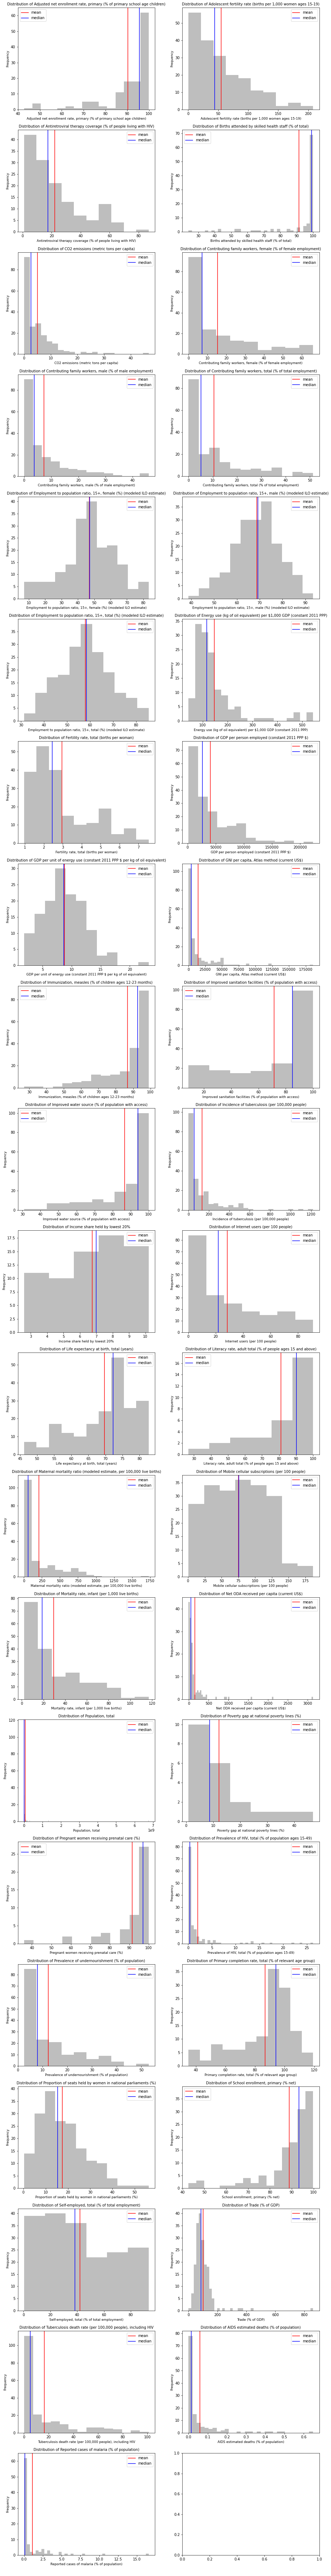

In [12]:
# Checking features values distribution
figures_in_row = 2
count = continuous_feature.shape[1]
figures_in_col = int(round((count + 0.5), 0) / figures_in_row)

fig, axes = plt.subplots(figures_in_col, figures_in_row, figsize = (15, 130))

for num, feature in enumerate(continuous_feature):
    y = dataset[feature].copy().dropna()
    axes[num // figures_in_row, num % figures_in_row].hist(y, bins = 'fd', color = 'darkgray', alpha = 0.75)
    axes[num // figures_in_row, num % figures_in_row].set_xlabel(feature + '\n\n', fontsize = 9)
    axes[num // figures_in_row, num % figures_in_row].set_ylabel('Frequency', fontsize = 9)
    axes[num // figures_in_row, num % figures_in_row].axvline(x = y.mean(), color = 'red')
    axes[num // figures_in_row, num % figures_in_row].axvline(x = y.median(), color = 'blue')
    axes[num // figures_in_row, num % figures_in_row].legend(labels =  ['mean', 'median'])
    axes[num // figures_in_row, num % figures_in_row].set_title(label = "Distribution of " \
                                                                + feature, fontsize = 10)
    

In [13]:
# Set the Cool Name
cool_name = 'Cliffhanger'


In [14]:
# Dataset for the region
data_region = dataset.loc[ : , : ][dataset.loc[ : , 'Cool Name'] == cool_name]
data_region.round(decimals = 2)


,Country Code Total,Country Name,Hult Region,Cool Name,"Adjusted net enrollment rate, primary (% of primary school age children)","Adolescent fertility rate (births per 1,000 women ages 15-19)",Antiretroviral therapy coverage (% of people living with HIV),Births attended by skilled health staff (% of total),CO2 emissions (metric tons per capita),"Contributing family workers, female (% of female employment)","Contributing family workers, male (% of male employment)","Contributing family workers, total (% of total employment)","Employment to population ratio, 15+, female (%) (modeled ILO estimate)","Employment to population ratio, 15+, male (%) (modeled ILO estimate)","Employment to population ratio, 15+, total (%) (modeled ILO estimate)","Energy use (kg of oil equivalent) per $1,000 GDP (constant 2011 PPP)","Fertility rate, total (births per woman)",GDP per person employed (constant 2011 PPP $),GDP per unit of energy use (constant 2011 PPP $ per kg of oil equivalent),"GNI per capita, Atlas method (current US$)","Immunization, measles (% of children ages 12-23 months)",Improved sanitation facilities (% of population with access),Improved water source (% of population with access),"Incidence of tuberculosis (per 100,000 people)",Income share held by lowest 20%,Internet users (per 100 people),"Life expectancy at birth, total (years)","Literacy rate, adult total (% of people ages 15 and above)","Maternal mortality ratio (modeled estimate, per 100,000 live births)",Mobile cellular subscriptions (per 100 people),"Mortality rate, infant (per 1,000 live births)",Net ODA received per capita (current US$),"Population, total",Poverty gap at national poverty lines (%),Pregnant women receiving prenatal care (%),"Prevalence of HIV, total (% of population ages 15-49)",Prevalence of undernourishment (% of population),"Primary completion rate, total (% of relevant age group)",Proportion of seats held by women in national parliaments (%),"School enrollment, primary (% net)","Self-employed, total (% of total employment)",Trade (% of GDP),"Tuberculosis death rate (per 100,000 people), including HIV",AIDS estimated deaths (% of population),Reported cases of malaria (% of population)
8,ASM,American Samoa,Australia & Oceania,Cliffhanger,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.1,100.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,247.78,0.50,NaN,NaN
10,AUS,Australia,Australia & Oceania,Cliffhanger,96.70,16.64,56.0,99.1,18.16,0.33,0.18,0.25,55.99,69.80,62.84,144.31,1.98,81063.91,6.93,42270.0,94.0,100.0,100.0,6.5,7.2,71.67,81.40,NaN,7.0,103.64,4.4,NaN,21249200,NaN,98.3,0.1,2.5,NaN,26.7,96.56,18.24,42.93,0.30,0.00,NaN
62,FJI,Fiji,Australia & Oceania,Cliffhanger,99.33,44.77,NaN,98.8,1.06,26.23,10.49,15.58,33.31,67.50,50.67,NaN,2.74,20742.53,NaN,4020.0,94.0,86.8,94.3,16.0,6.6,13.00,68.91,NaN,36.0,71.15,20.2,53.66,843340,9.9,100.0,NaN,4.3,106.19,NaN,96.81,41.88,130.72,3.10,NaN,NaN
65,FSM,"Micronesia, Fed. Sts.",Australia & Oceania,Cliffhanger,NaN,24.05,NaN,90.0,1.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.59,NaN,NaN,2570.0,86.0,49.2,89.4,196.0,NaN,14.49,68.38,NaN,122.0,26.32,34.4,901.05,104478,NaN,80.0,NaN,NaN,NaN,NaN,NaN,NaN,107.71,22.00,NaN,NaN
79,GUM,Guam,Australia & Oceania,Cliffhanger,NaN,45.36,NaN,NaN,NaN,2.31,1.52,1.84,49.76,72.58,61.29,NaN,2.53,72608.01,NaN,NaN,NaN,89.6,99.5,64.0,NaN,48.42,77.54,NaN,NaN,NaN,NaN,NaN,159035,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.82,78.90,5.30,NaN,NaN
102,KIR,Kiribati,Australia & Oceania,Cliffhanger,NaN,26.02,NaN,65.0,0.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.87,NaN,NaN,1880.0,72.0,37.9,64.1,425.0,NaN,7.00,65.15,NaN,119.0,1.02,50.5,278.95,98440,NaN,100.0,NaN,4.4,106.68,4.3,NaN,NaN,105.12,36.00,NaN,NaN
125,MHL,Marshall Islands,Australia & Oceania,Cliffhanger,NaN,NaN,NaN,NaN,1.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3760.0,86.0,74.2,94.1,299.0,NaN,4.60,NaN,NaN,NaN,NaN,31.8,1005.21,52218,NaN,NaN,NaN,NaN,114.33,3.0,NaN,NaN,118.90,33.00,NaN,NaN
132,MNP,Northern Mariana Islands,Australia 

In [15]:
# Information on the region's dataset
data_region.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 8 to 211
Data columns (total 45 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Country Code Total                                                         19 non-null     object 
 1   Country Name                                                               19 non-null     object 
 2   Hult Region                                                                19 non-null     object 
 3   Cool Name                                                                  19 non-null     object 
 4   Adjusted net enrollment rate, primary (% of primary school age children)   3 non-null      float64
 5   Adolescent fertility rate (births per 1,000 women ages 15-19)              13 non-null     float64
 6   Antiretroviral therapy coverage (% of people living with HI

In [16]:
# Checking the region's dataset statistics
data_region.describe(include = ['number']).round(decimals = 2)


,"Adjusted net enrollment rate, primary (% of primary school age children)","Adolescent fertility rate (births per 1,000 women ages 15-19)",Antiretroviral therapy coverage (% of people living with HIV),Births attended by skilled health staff (% of total),CO2 emissions (metric tons per capita),"Contributing family workers, female (% of female employment)","Contributing family workers, male (% of male employment)","Contributing family workers, total (% of total employment)","Employment to population ratio, 15+, female (%) (modeled ILO estimate)","Employment to population ratio, 15+, male (%) (modeled ILO estimate)","Employment to population ratio, 15+, total (%) (modeled ILO estimate)","Energy use (kg of oil equivalent) per $1,000 GDP (constant 2011 PPP)","Fertility rate, total (births per woman)",GDP per person employed (constant 2011 PPP $),GDP per unit of energy use (constant 2011 PPP $ per kg of oil equivalent),"GNI per capita, Atlas method (current US$)","Immunization, measles (% of children ages 12-23 months)",Improved sanitation facilities (% of population with access),Improved water source (% of population with access),"Incidence of tuberculosis (per 100,000 people)",Income share held by lowest 20%,Internet users (per 100 people),"Life expectancy at birth, total (years)","Literacy rate, adult total (% of people ages 15 and above)","Maternal mortality ratio (modeled estimate, per 100,000 live births)",Mobile cellular subscriptions (per 100 people),"Mortality rate, infant (per 1,000 live births)",Net ODA received per capita (current US$),"Population, total",Poverty gap at national poverty lines (%),Pregnant women receiving prenatal care (%),"Prevalence of HIV, total (% of population ages 15-49)",Prevalence of undernourishment (% of population),"Primary completion rate, total (% of relevant age group)",Proportion of seats held by women in national parliaments (%),"School enrollment, primary (% net)","Self-employed, total (% of total employment)",Trade (% of GDP),"Tuberculosis death rate (per 100,000 people), including HIV",AIDS estimated deaths (% of population),Reported cases of malaria (% of population)
count,3.00,13.00,3.00,7.00,16.00,11.00,11.00,11.00,11.00,11.00,11.00,2.00,13.00,11.00,2.00,13.00,14.00,18.00,19.00,19.00,3.00,15.00,13.00,0.0,10.00,12.00,14.00,12.00,19.00,1.0,6.00,3.00,9.00,4.00,8.00,3.00,11.00,14.00,19.00,3.00,3.00
mean,98.54,35.80,40.33,92.37,4.22,15.95,11.18,13.51,49.61,67.04,58.36,136.19,3.21,42605.30,7.37,8305.38,81.79,72.66,90.69,109.36,6.73,22.61,72.29,NaN,99.60,50.27,25.27,870.12,1854260.58,9.9,96.22,0.37,5.16,102.05,10.45,97.59,43.62,106.26,13.43,0.01,3.65
std,1.60,15.07,23.76,12.52,5.45,20.51,13.89,14.35,13.36,11.53,11.54,11.49,0.93,35163.34,0.62,12521.25,15.70,25.94,15.45,136.97,0.42,24.15,5.56,NaN,74.60,37.62,14.41,959.28,5009201.04,NaN,7.98,0.46,2.77,14.51,12.47,1.57,22.65,48.33,21.88,0.01,3.80
min,96.70,16.64,13.00,65.00,0.37,0.28,0.18,0.23,23.45,38.83,31.36,128.06,1.98,4384.98,6.93,970.00,44.00,19.00,38.30,6.00,6.40,1.15,64.25,NaN,7.00,1.02,4.40,44.52,9947.00,9.9,80.00,0.10,2.50,81.01,0.90,96.56,17.33,42.93,0.30,0.00,1.24
25%,98.01,24.05,32.50,93.35,0.91,0.80,0.51,0.65,42.78,63.68,52.86,132.12,2.20,10038.57,7.15,2530.00,72.25,55.65,91.75,15.50,6.50,6.02,68.38,NaN,44.25,15.20,16.52,243.08,57230.50,9.9,98.48,0.10,3.50,99.89,3.08,96.68,26.19,77.40,1.50,0.00,1.46
50%,99.33,30.99,52.00,97.00,1.15,4.65,8.96,9.21,50.18,71.42,61.29,136.19,3.59,29815.57,7.37,3240.00,86.00,80.20,96.80,57.00,6.60,13.00,71.91,NaN,110.00,53.34,23.45,427.37,159035.00,9.9,99.50,0.10,4.30,106.43,4.05,96.81,41.31,103.95,4.60,0.00,1.67
75%,99.46,45.36,54.00,98.95,5.33,25.53,17.30,25.80,57.99,73.73,65.62,140.25,4.01,76835.96,7.59,4650.00,93.75,91.80,99.25,142.50,6.90,34.19,76.68,NaN,124.25,73.51,31.80,1145.59,383828.00,9.9,100.00,0.50,5.80,108.59,12.82,98.11,62.40,117.05,15.00,0.01,4.85
max,99.60,60.83,56.00,100.00,18.16,53.69,45.88,34.72,69.62,79.58,70.76,144.31,4.43,91536.16,7.81,42270.00,99.00,100.00,100.00,432.00,7.20,72.

In [17]:
# Dataset for the rest of the world
data_world = dataset.loc[ : , : ][dataset.loc[ : , 'Cool Name'] != cool_name]
data_world.round(decimals = 2)


,Country Code Total,Country Name,Hult Region,Cool Name,"Adjusted net enrollment rate, primary (% of primary school age children)","Adolescent fertility rate (births per 1,000 women ages 15-19)",Antiretroviral therapy coverage (% of people living with HIV),Births attended by skilled health staff (% of total),CO2 emissions (metric tons per capita),"Contributing family workers, female (% of female employment)","Contributing family workers, male (% of male employment)","Contributing family workers, total (% of total employment)","Employment to population ratio, 15+, female (%) (modeled ILO estimate)","Employment to population ratio, 15+, male (%) (modeled ILO estimate)","Employment to population ratio, 15+, total (%) (modeled ILO estimate)","Energy use (kg of oil equivalent) per $1,000 GDP (constant 2011 PPP)","Fertility rate, total (births per woman)",GDP per person employed (constant 2011 PPP $),GDP per unit of energy use (constant 2011 PPP $ per kg of oil equivalent),"GNI per capita, Atlas method (current US$)","Immunization, measles (% of children ages 12-23 months)",Improved sanitation facilities (% of population with access),Improved water source (% of population with access),"Incidence of tuberculosis (per 100,000 people)",Income share held by lowest 20%,Internet users (per 100 people),"Life expectancy at birth, total (years)","Literacy rate, adult total (% of people ages 15 and above)","Maternal mortality ratio (modeled estimate, per 100,000 live births)",Mobile cellular subscriptions (per 100 people),"Mortality rate, infant (per 1,000 live births)",Net ODA received per capita (current US$),"Population, total",Poverty gap at national poverty lines (%),Pregnant women receiving prenatal care (%),"Prevalence of HIV, total (% of population ages 15-49)",Prevalence of undernourishment (% of population),"Primary completion rate, total (% of relevant age group)",Proportion of seats held by women in national parliaments (%),"School enrollment, primary (% net)","Self-employed, total (% of total employment)",Trade (% of GDP),"Tuberculosis death rate (per 100,000 people), including HIV",AIDS estimated deaths (% of population),Reported cases of malaria (% of population)
0,ABW,Aruba,Carribean Islands & Parts of Latin America,Ratchet,99.10,32.79,NaN,NaN,26.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.76,NaN,NaN,NaN,NaN,97.8,96.8,11.0,NaN,52.00,74.72,NaN,NaN,119.19,NaN,NaN,101353,NaN,NaN,NaN,NaN,95.13,NaN,99.06,NaN,141.19,0.89,NaN,NaN
1,AFG,Afghanistan,Middle East & Russia,Mirage,NaN,111.14,NaN,24.0,0.15,64.24,23.49,28.86,12.92,79.79,47.43,NaN,6.25,5276.73,NaN,360.0,59.0,28.0,44.4,189.0,NaN,1.84,60.24,NaN,676.0,28.94,70.6,178.60,27294031,NaN,36.0,NaN,24.6,NaN,27.7,NaN,72.32,73.07,40.00,NaN,0.30
2,AGO,Angola,Sub-Saharan Africa,Sideswipe,74.89,178.18,6.0,NaN,1.18,15.12,11.88,13.48,63.49,69.60,66.45,82.05,6.31,17090.73,12.19,2760.0,57.0,43.3,46.6,382.0,5.4,1.90,56.19,NaN,606.0,31.13,86.4,16.96,21759420,12.7,NaN,1.6,23.7,39.27,37.3,74.89,71.97,127.54,69.00,0.04,6.33
3,ALB,Albania,Eastern Europe,Skids & Mudflap,87.15,18.91,14.0,NaN,1.48,48.59,14.10,28.78,40.38,55.51,47.87,77.65,1.65,24757.50,12.88,3950.0,98.0,89.6,95.8,16.0,8.9,23.86,75.94,95.94,30.0,62.16,12.3,123.79,2947314,2.3,NaN,0.1,9.7,92.83,7.1,87.15,59.30,77.45,0.70,0.00,NaN
4,AND,Andorra,Eastern Europe,Skids & Mudflap,NaN,NaN,NaN,NaN,6.43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.25,NaN,NaN,NaN,98.0,100.0,100.0,5.5,NaN,70.04,NaN,NaN,NaN,76.56,3.9,NaN,83861,NaN,NaN,NaN,NaN,NaN,25.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,XKX,Kosovo,Eastern Europe,Skids & Mudflap,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,168.47,2.38,NaN,5.94,3100.0,NaN,NaN,NaN,NaN,NaN,NaN,69.40,NaN,NaN,32.30,NaN,NaN,1747383,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.91,NaN,NaN,NaN
213,YEM,"Yemen, Rep.",Arabian Peninsula,Wheeljack,75.99,74.81,NaN,NaN,1.00,28.73,9.11,11.13,7.09,61.5

In [18]:
# Information on the rest of the world's dataset
data_world.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 198 entries, 0 to 216
Data columns (total 45 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Country Code Total                                                         198 non-null    object 
 1   Country Name                                                               198 non-null    object 
 2   Hult Region                                                                198 non-null    object 
 3   Cool Name                                                                  198 non-null    object 
 4   Adjusted net enrollment rate, primary (% of primary school age children)   128 non-null    float64
 5   Adolescent fertility rate (births per 1,000 women ages 15-19)              181 non-null    float64
 6   Antiretroviral therapy coverage (% of people living with H

In [19]:
# Checking the rest of the world's dataset statistics
data_world.describe(include = ['number']).round(decimals = 2)


,"Adjusted net enrollment rate, primary (% of primary school age children)","Adolescent fertility rate (births per 1,000 women ages 15-19)",Antiretroviral therapy coverage (% of people living with HIV),Births attended by skilled health staff (% of total),CO2 emissions (metric tons per capita),"Contributing family workers, female (% of female employment)","Contributing family workers, male (% of male employment)","Contributing family workers, total (% of total employment)","Employment to population ratio, 15+, female (%) (modeled ILO estimate)","Employment to population ratio, 15+, male (%) (modeled ILO estimate)","Employment to population ratio, 15+, total (%) (modeled ILO estimate)","Energy use (kg of oil equivalent) per $1,000 GDP (constant 2011 PPP)","Fertility rate, total (births per woman)",GDP per person employed (constant 2011 PPP $),GDP per unit of energy use (constant 2011 PPP $ per kg of oil equivalent),"GNI per capita, Atlas method (current US$)","Immunization, measles (% of children ages 12-23 months)",Improved sanitation facilities (% of population with access),Improved water source (% of population with access),"Incidence of tuberculosis (per 100,000 people)",Income share held by lowest 20%,Internet users (per 100 people),"Life expectancy at birth, total (years)","Literacy rate, adult total (% of people ages 15 and above)","Maternal mortality ratio (modeled estimate, per 100,000 live births)",Mobile cellular subscriptions (per 100 people),"Mortality rate, infant (per 1,000 live births)",Net ODA received per capita (current US$),"Population, total",Poverty gap at national poverty lines (%),Pregnant women receiving prenatal care (%),"Prevalence of HIV, total (% of population ages 15-49)",Prevalence of undernourishment (% of population),"Primary completion rate, total (% of relevant age group)",Proportion of seats held by women in national parliaments (%),"School enrollment, primary (% net)","Self-employed, total (% of total employment)",Trade (% of GDP),"Tuberculosis death rate (per 100,000 people), including HIV",AIDS estimated deaths (% of population),Reported cases of malaria (% of population)
count,128.00,181.00,133.00,95.00,188.00,176.00,176.00,176.00,176.00,176.00,176.00,135.00,189.00,173.00,135.00,180.00,178.00,179.00,178.00,188.00,67.00,188.00,188.00,32.00,174.00,190.00,180.00,132.00,1.980000e+02,20.00,41.00,134.00,163.00,127.00,172.00,128.00,176.00,176.00,178.00,129.00,90.00
mean,90.14,56.15,21.86,91.28,5.12,15.44,7.12,10.27,46.85,68.82,57.97,147.33,2.94,39971.17,8.77,14814.11,87.21,71.44,86.18,136.31,6.75,29.00,69.52,81.12,212.75,76.61,29.89,85.34,6.805155e+07,12.31,90.76,2.10,12.75,86.28,17.86,88.63,42.09,100.19,16.83,0.06,1.04
std,12.54,45.96,18.40,17.35,6.67,18.51,8.88,12.36,16.17,9.93,11.43,99.72,1.57,40623.12,3.74,24900.53,13.82,29.91,16.23,197.79,2.12,26.37,9.14,18.54,286.04,42.97,27.04,124.85,4.960190e+08,12.14,13.92,4.50,11.57,18.90,10.03,12.22,26.49,79.95,22.98,0.11,2.39
min,42.74,0.57,1.00,24.00,0.02,0.01,0.01,0.01,7.09,44.99,31.52,43.02,0.96,1573.00,1.84,180.00,27.00,8.80,30.90,1.20,2.60,0.22,46.19,26.83,3.00,0.74,2.20,-9.30,2.560400e+04,0.90,36.00,0.10,2.50,35.05,0.30,42.74,0.46,0.18,0.11,0.00,0.00
25%,87.88,17.64,8.00,95.20,0.61,1.28,0.62,0.91,38.82,61.88,50.65,89.60,1.77,8104.81,6.19,1160.00,80.25,45.65,80.20,15.75,5.10,6.11,62.85,73.74,15.50,37.70,7.68,16.81,1.412217e+06,2.75,90.10,0.10,2.60,77.98,10.50,87.30,17.38,61.98,1.22,0.00,0.01
50%,95.58,45.16,17.00,99.10,2.82,7.36,3.63,4.95,46.92,68.99,58.32,115.54,2.40,25817.77,8.66,4680.00,93.00,85.90,93.00,57.50,7.10,22.78,72.49,90.30,58.00,77.80,18.35,48.95,6.926039e+06,8.10,96.30,0.45,9.10,93.63,16.10,92.98,38.03,86.72,5.25,0.01,0.11
75%,97.98,87.02,30.00,99.80,7.03,23.76,9.98,13.59,57.96,75.55,64.77,161.59,3.69,56308.79,11.16,16075.00,97.00,97.20,98.80,164.00,8.60,46.83,75.83,93.92,340.00,109.02,47.40,94.63,2.272417e+07,15.42,99.50,1.60,18.65,98.32,23.42,96.48,63.35,115.42,23.75,0.06,0.56
max,99.86,208.12,87.00,100.00,46.67,66.02,43.12,51.34,

In [20]:
# Add sttribute Region/World to the entire dataset
dataset['Region/World'] = dataset['Cool Name'].apply(lambda x: 'Region' if x == cool_name else 'World')


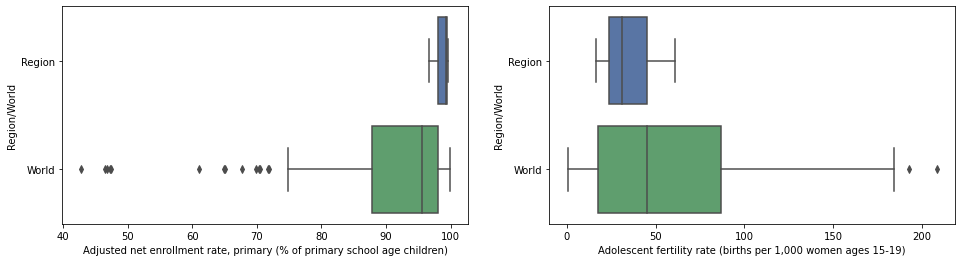

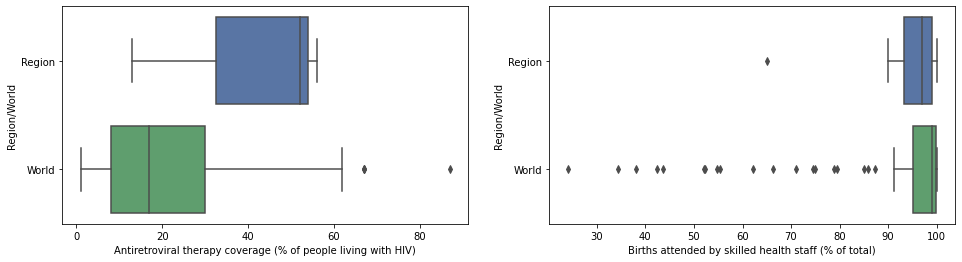

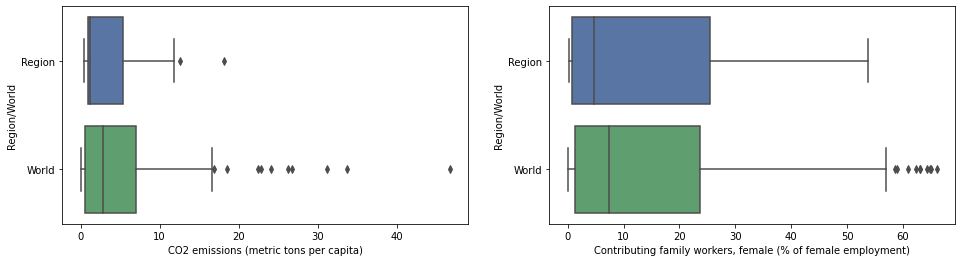

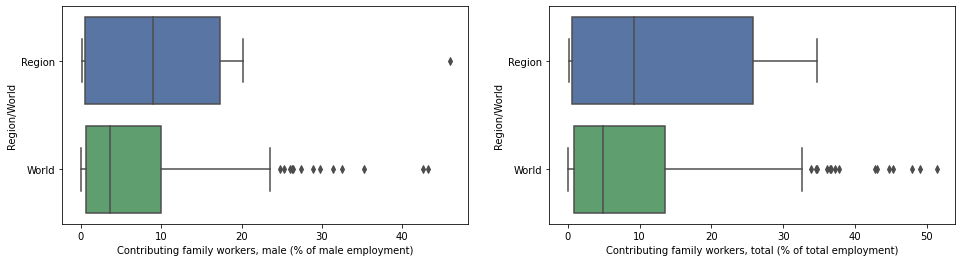

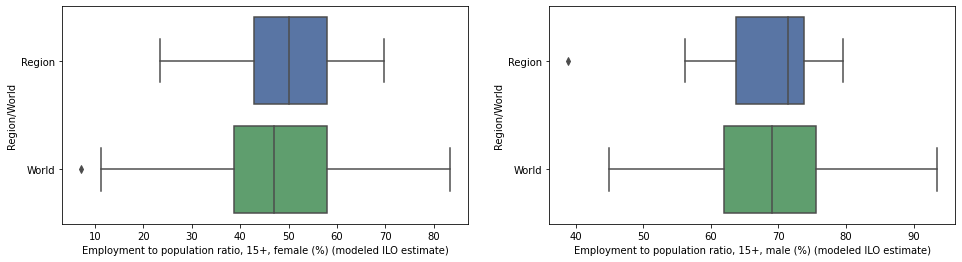

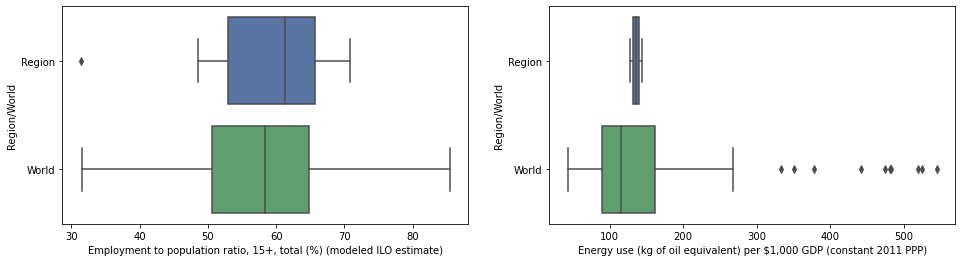

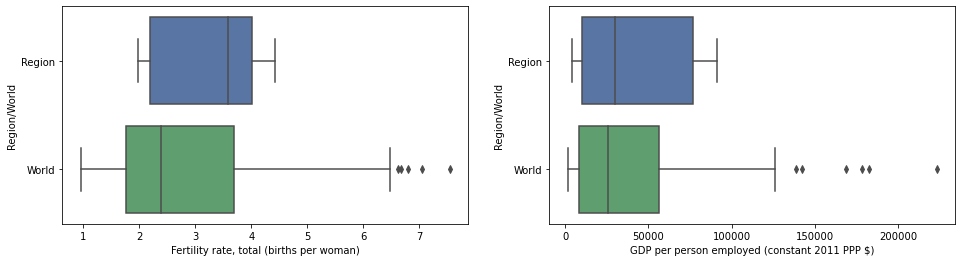

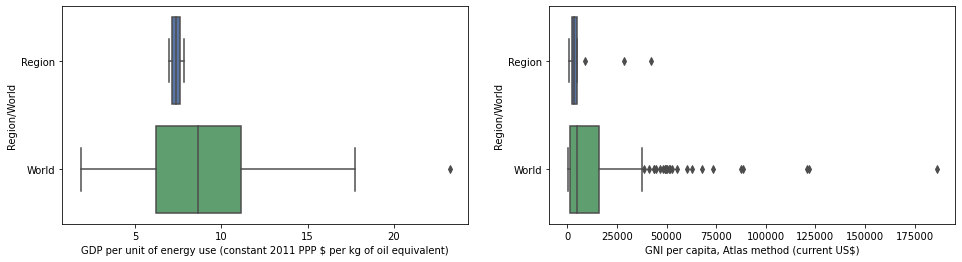

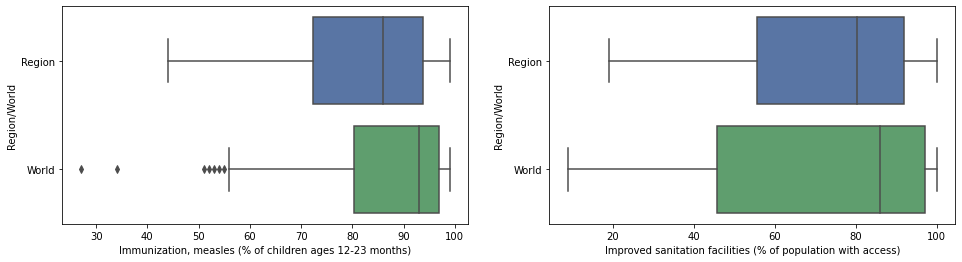

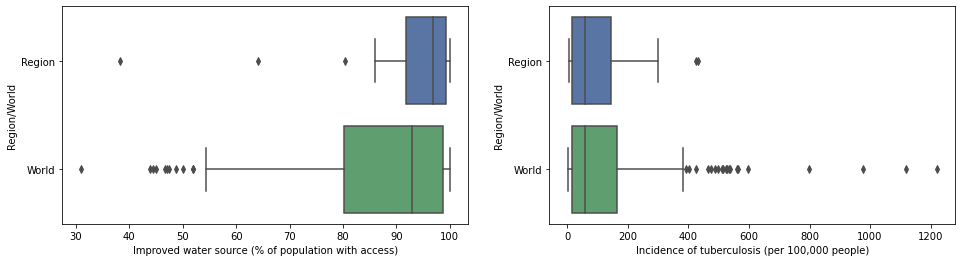

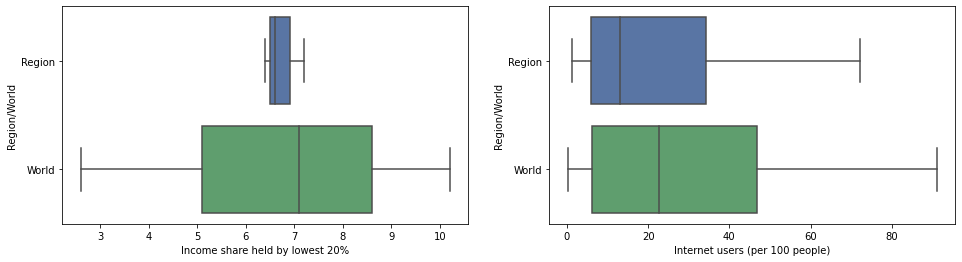

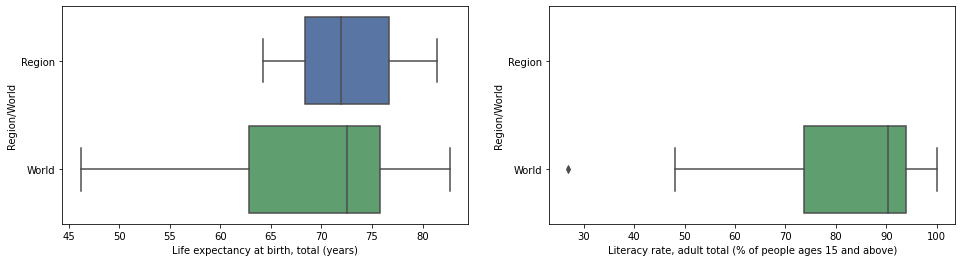

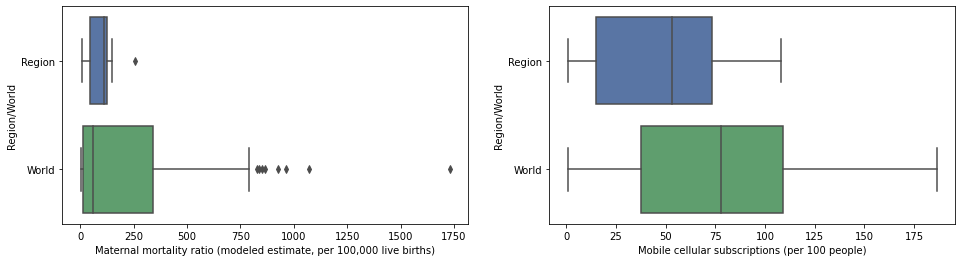

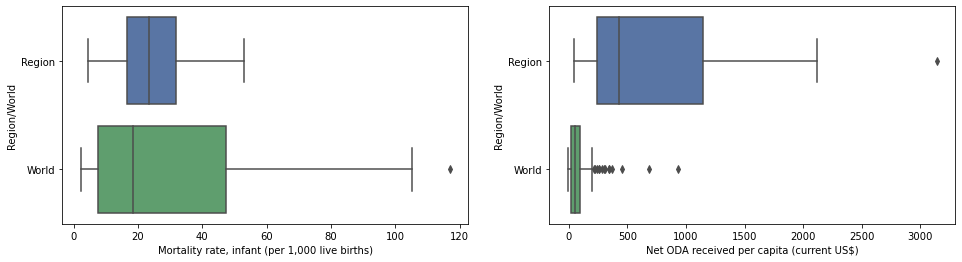

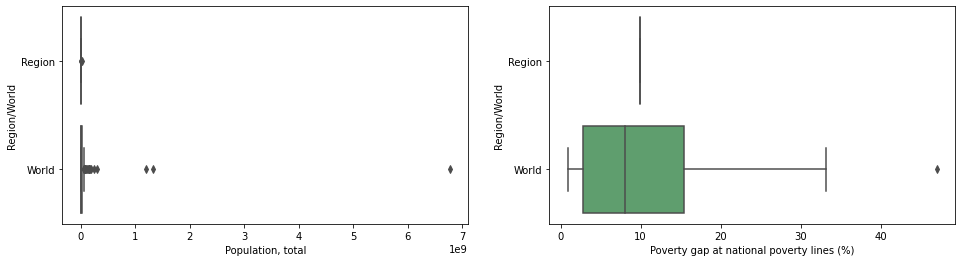

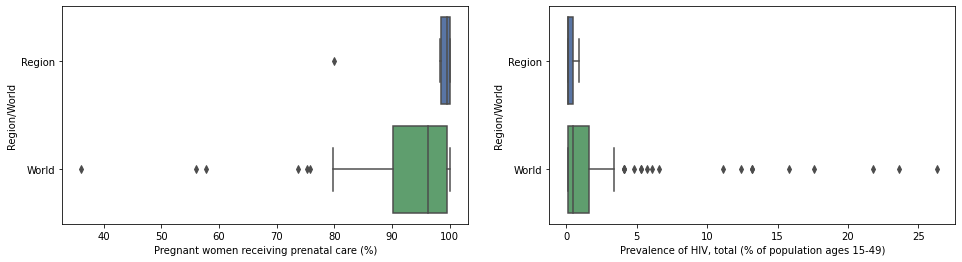

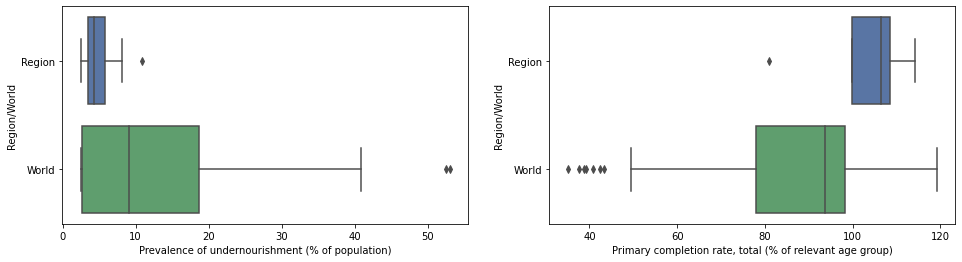

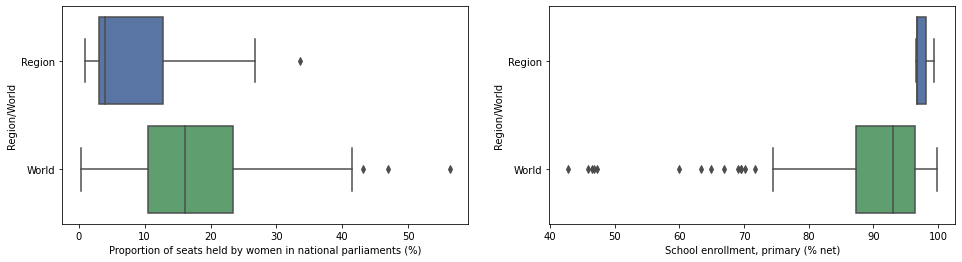

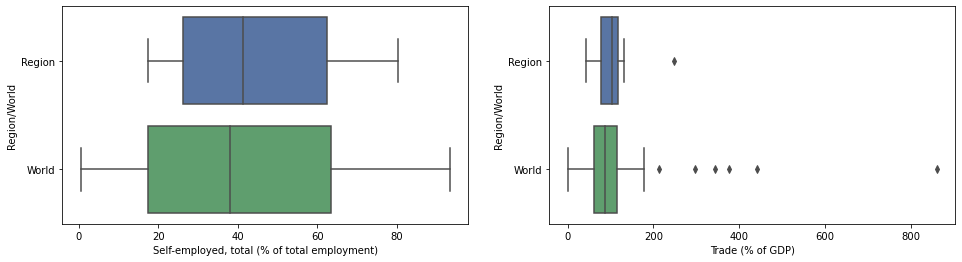

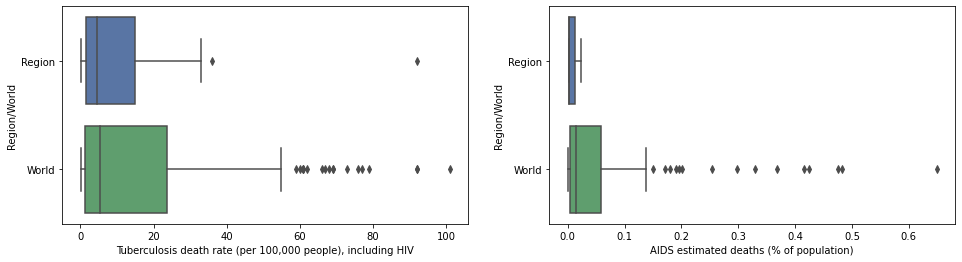

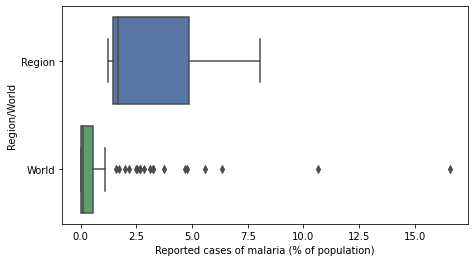

In [21]:
# Create boxplots for the entire dataset
figures_per_time = 2
count = 0
my_palette = sns.color_palette(["#4C72B0", "#55A868"])

for feature_name in continuous_feature.columns:

    plt.figure(count // figures_per_time, figsize = (16, 4))
    plt.subplot(1, figures_per_time, np.mod(count, figures_per_time) + 1).set_xlabel(feature_name, fontsize = 10)
    sns.boxplot(x = feature_name, y = 'Region/World', data = dataset, palette = my_palette,\
                order = ["Region", "World"])

    count += 1
    

In [22]:
# ?????????????????????????????????????????????????????????????????????????????????#
# Since outliers are just outliers in terms of statistics, but that values reflect #
# real situations in different countries, we are not going to correct them.        #
# Instead, we will use medians to reduce the outliers effect.                      #
# ?????????????????????????????????????????????????????????????????????????????????#

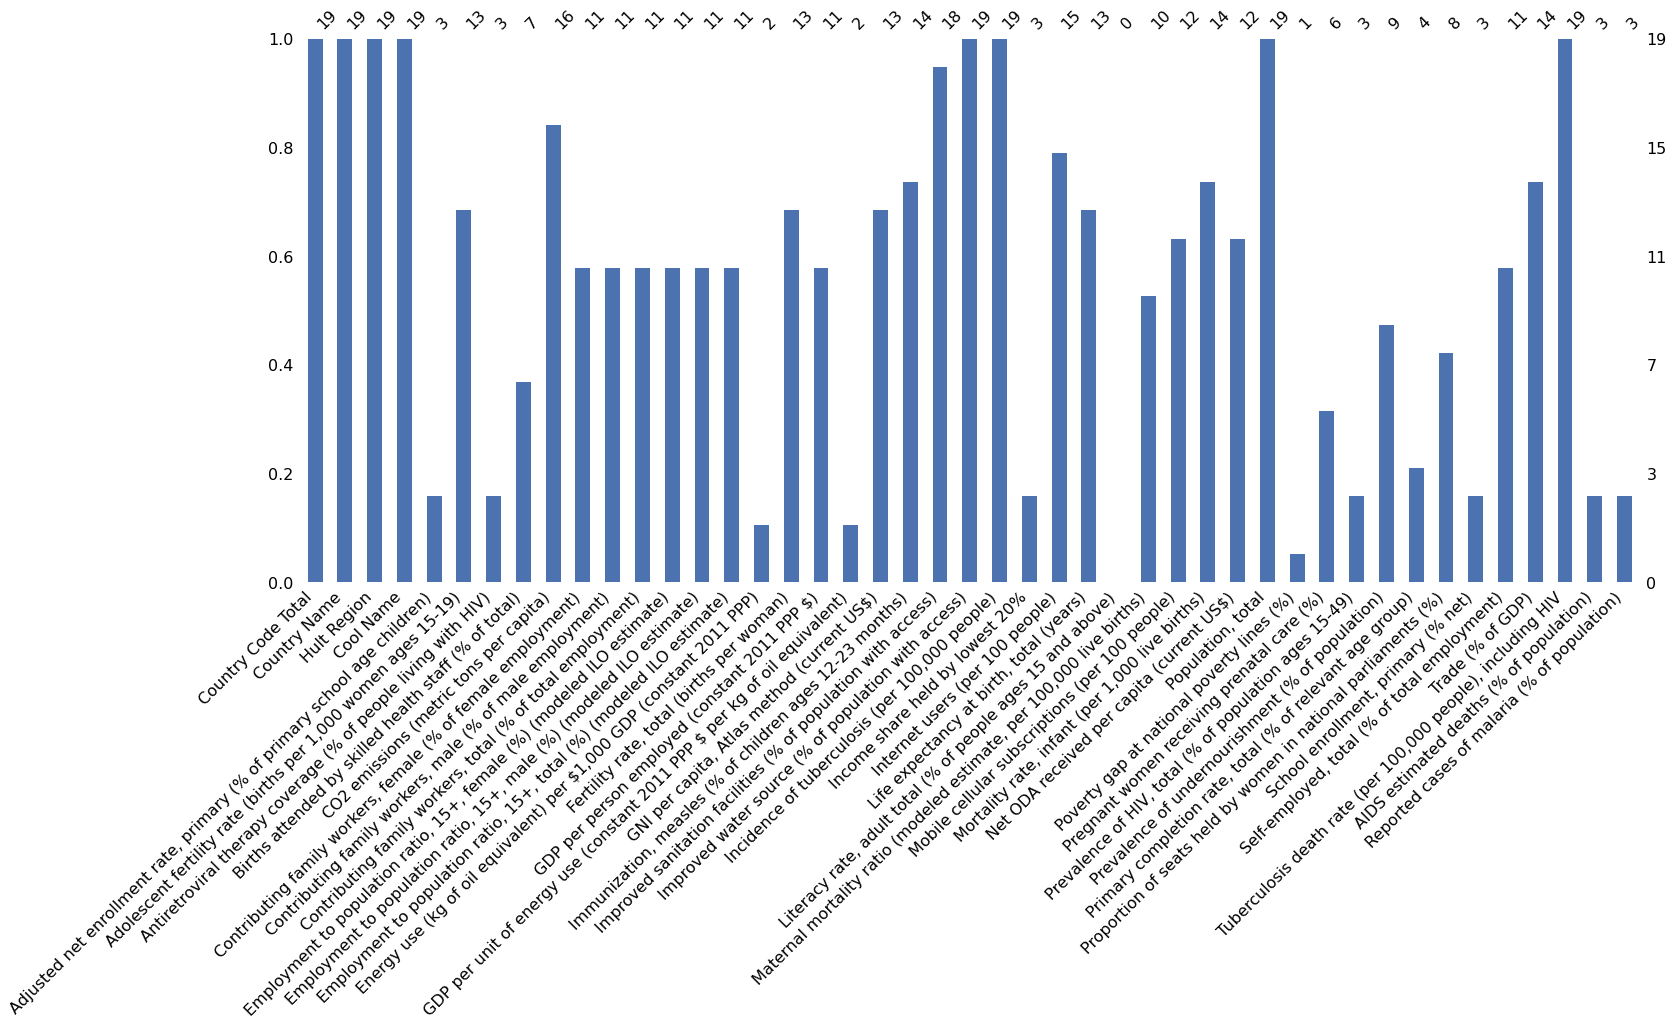

In [23]:
# Barchart of missing values in datasubset for our region
msno.bar(df = data_region, labels = True, color = '#4C72B0');


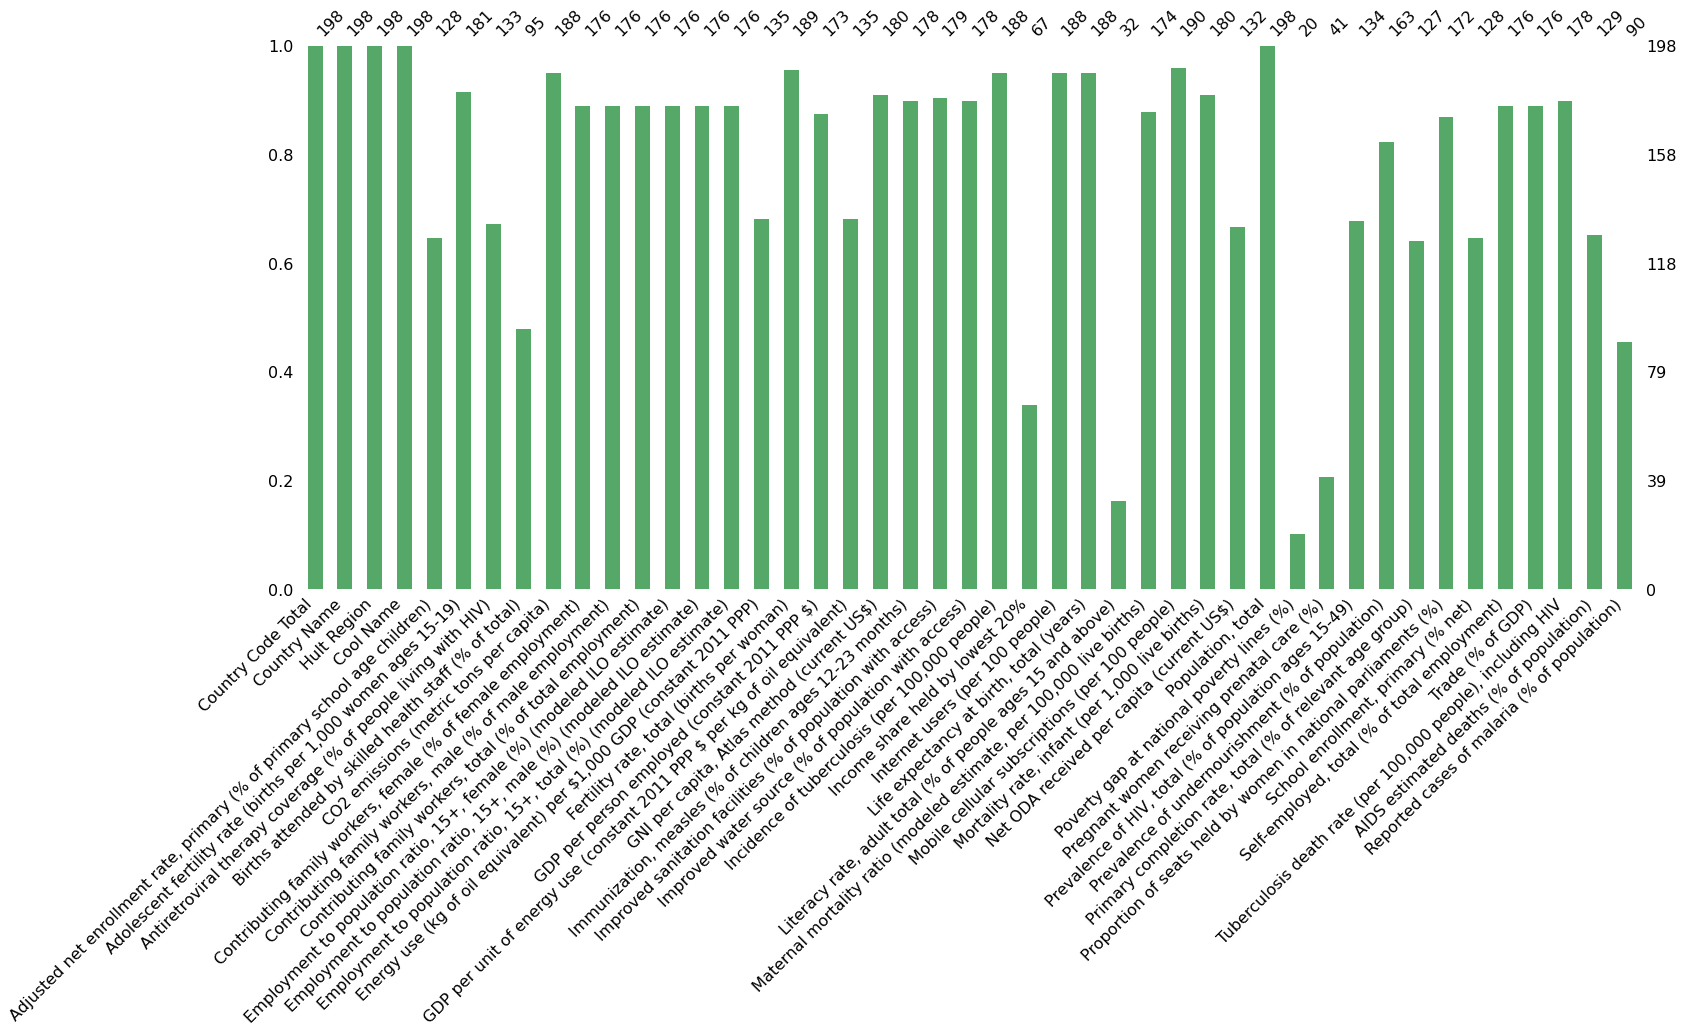

In [24]:
# Barchart of missing values in datasubset for the rest of the world
msno.bar(df = data_world, labels = True, color = '#55A868');


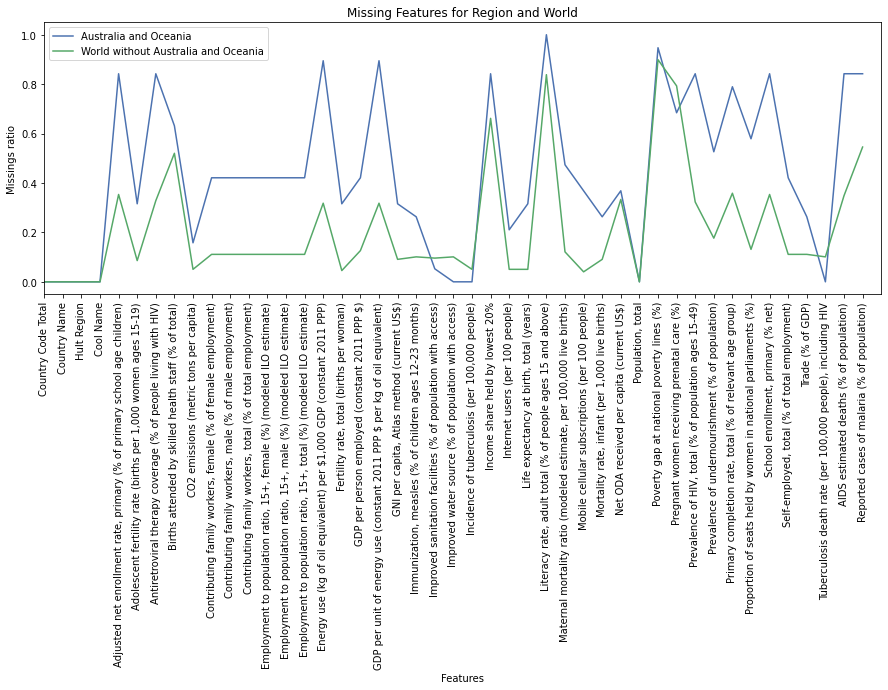

In [25]:
# Comparison of missing values by features 
fig = plt.figure(figsize = (15, 5))
plt.plot(data_region.isnull().mean(), color = "#4C72B0")
plt.plot(data_world.isnull().mean(), color = "#55A868")
plt.xticks(range(data_region.shape[1]), data_region.columns, rotation = 90)
plt.ylabel("Missings ratio", size = 10)
plt.xlabel("Features", size = 10)
plt.legend(labels =  ['Australia and Oceania',
                      'World without Australia and Oceania'])
plt.title('Missing Features for Region and World')
plt.xlim(0, data_region.shape[1]);


In [26]:
### Idea: try to use columns with strong correlation to fill out the empty cells ###

In [27]:
# Correlation coefficients
correlation = continuous_feature.corr()


In [28]:
# Table of correlation coefficients
correlation.round(decimals = 2)


,"Adjusted net enrollment rate, primary (% of primary school age children)","Adolescent fertility rate (births per 1,000 women ages 15-19)",Antiretroviral therapy coverage (% of people living with HIV),Births attended by skilled health staff (% of total),CO2 emissions (metric tons per capita),"Contributing family workers, female (% of female employment)","Contributing family workers, male (% of male employment)","Contributing family workers, total (% of total employment)","Employment to population ratio, 15+, female (%) (modeled ILO estimate)","Employment to population ratio, 15+, male (%) (modeled ILO estimate)","Employment to population ratio, 15+, total (%) (modeled ILO estimate)","Energy use (kg of oil equivalent) per $1,000 GDP (constant 2011 PPP)","Fertility rate, total (births per woman)",GDP per person employed (constant 2011 PPP $),GDP per unit of energy use (constant 2011 PPP $ per kg of oil equivalent),"GNI per capita, Atlas method (current US$)","Immunization, measles (% of children ages 12-23 months)",Improved sanitation facilities (% of population with access),Improved water source (% of population with access),"Incidence of tuberculosis (per 100,000 people)",Income share held by lowest 20%,Internet users (per 100 people),"Life expectancy at birth, total (years)","Literacy rate, adult total (% of people ages 15 and above)","Maternal mortality ratio (modeled estimate, per 100,000 live births)",Mobile cellular subscriptions (per 100 people),"Mortality rate, infant (per 1,000 live births)",Net ODA received per capita (current US$),"Population, total",Poverty gap at national poverty lines (%),Pregnant women receiving prenatal care (%),"Prevalence of HIV, total (% of population ages 15-49)",Prevalence of undernourishment (% of population),"Primary completion rate, total (% of relevant age group)",Proportion of seats held by women in national parliaments (%),"School enrollment, primary (% net)","Self-employed, total (% of total employment)",Trade (% of GDP),"Tuberculosis death rate (per 100,000 people), including HIV",AIDS estimated deaths (% of population),Reported cases of malaria (% of population)
"Adjusted net enrollment rate, primary (% of primary school age children)",1.00,-0.60,0.40,0.75,0.35,-0.36,-0.42,-0.39,-0.06,0.01,-0.04,-0.11,-0.69,0.32,0.12,0.34,0.60,0.65,0.63,-0.39,0.27,0.51,0.67,0.54,-0.72,0.54,-0.73,-0.11,0.01,-0.43,0.68,-0.21,-0.46,0.77,0.18,0.99,-0.53,0.12,-0.54,-0.32,-0.39
"Adolescent fertility rate (births per 1,000 women ages 15-19)",-0.60,1.00,-0.44,-0.63,-0.46,0.36,0.44,0.42,0.18,0.18,0.19,0.20,0.81,-0.53,-0.13,-0.51,-0.59,-0.76,-0.72,0.39,-0.64,-0.63,-0.78,-0.40,0.77,-0.60,0.78,-0.08,-0.03,0.58,-0.49,0.32,0.55,-0.71,-0.13,-0.58,0.68,-0.17,0.52,0.40,0.26
Antiretroviral therapy coverage (% of people living with HIV),0.40,-0.44,1.00,0.40,0.48,-0.39,-0.39,-0.38,-0.00,-0.10,-0.03,-0.27,-0.45,0.66,0.22,0.76,0.35,0.48,0.50,-0.28,0.29,0.73,0.54,0.39,-0.41,0.53,-0.54,0.12,-0.04,0.06,0.52,-0.07,-0.42,0.35,0.34,0.42,-0.57,0.10,-0.45,-0.14,-0.15
Births attended by skilled health staff (% of total),0.75,-0.63,0.40,1.00,0.35,-0.55,-0.48,-0.49,-0.04,-0.25,-0.14,-0.01,-0.85,0.43,-0.04,0.35,0.75,0.85,0.76,-0.52,0.42,0.51,0.72,0.81,-0.77,0.60,-0.86,0.10,-0.18,-0.85,0.76,-0.17,-0.58,0.71,-0.02,0.72,-0.76,0.28,-0.75,-0.29,-0.44
CO2 emissions (metric tons per capita),0.35,-0.46,0.48,0.35,1.00,-0.41,-0.42,-0.43,-0.05,0.06,0.08,0.07,-0.44,0.77,-0.15,0.56,0.35,0.53,0.45,-0.31,0.46,0.56,0.45,0.26,-0.42,0.50,-0.46,0.06,-0.01,-0.41,0.42,-0.16,-0.47,0.37,0.13,0.34,-0.62,0.21,-0.37,-0.19,-0.24
"Contributing family workers, female (% of female employment)",-0.36,0.36,-0.39,-0.55,-0.41,1.00,0.81,0.94,0.13,0.30,0.21,0.15,0.44,-0.49,-0.10,-0.44,-0.33,-0.54,-0.53,0.30,-0.15,-0.53,-0.41,-0.35,0.35,-0.56,0.45,0.02,0.05,-0.06,-0.65,-0.00,0.49,-0.41,-0.17,-0.35,0.70,-0.22,0.47,0.03,0.01
"Contributing family workers, male (% of male employment)",-0.42,0.44,-0.39,-0.48,-0.42,0.81,1.00,0.94,0.22,0.23,0.24,0.21,0.52,-0.49,-0.19,-0.44,

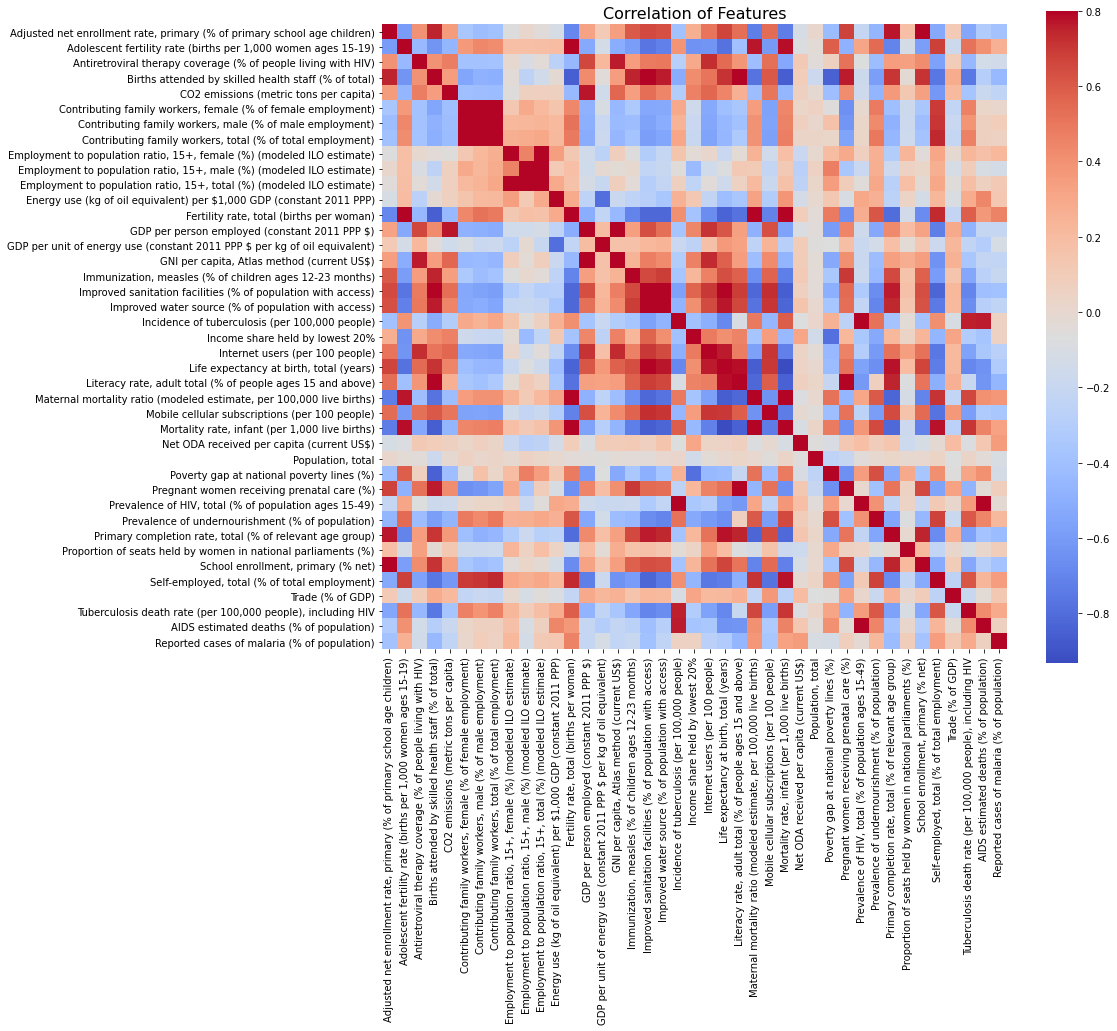

In [29]:
# Heatmap of correlation
fig, axes = plt.subplots(figsize = (14, 12))
plt.title("Correlation of Features", y = 1, size = 16)
sns.heatmap(correlation, square = True, vmax = 0.8, cmap = "coolwarm");


In [30]:
# List of numeric columns names
quant_feats = continuous_feature.columns.tolist()


In [31]:
# Create dataset we will add predicted values in
dataset_updated = dataset.copy()

for corr_coeff_x_100 in range(48, 94):
    corr_coeff = corr_coeff_x_100 / 100
    
    # To check how many values finally were predicted with each corr_coef we will use
    data_filled_out = 0

    # Treshold of r2 - we will make predictions only if model has r2 > r_2_min
    r_2_min = 0.75

    
    # Iteration over all columns except those we can't predict 
    # to create models and try to fill out missing values
    for col_num in range(len(quant_feats)):

        column_to_predict = quant_feats[col_num]

        
        if column_to_predict != 'Population, total':

            # Create list of columns which have more or less strong correlation with
            # the column we are trying to fill out (including the column we are going
            # to fill out)
            cols_with_col_to_pred = correlation.loc[:, column_to_predict]\
                [correlation.loc[ : , column_to_predict].abs() > corr_coeff].index.tolist()

            # Create data subset without columns with weak correlation with the column
            # we are going to fill out (including the column we are going
            # to fill out)
            datasubset_with_col_to_predict = dataset.loc[ : , cols_with_col_to_pred].copy().dropna()

            # Remove the name of column we are going to fill out from the list of columns
            cols_without_col_to_pred = cols_with_col_to_pred.copy()
            cols_without_col_to_pred.remove(column_to_predict)

            
            # If we don't have any column to use for prediction, skip the step
            if len(cols_without_col_to_pred) != 0:

                # Amount of rows in data subset
                rows_dss_with_col_to_predict = datasubset_with_col_to_predict.shape[0]

                # Create data subset without columns with weak correlation with the column
                # we are going to fill out (not including the column we are going
                # to fill out)
                datasubset_wo_col_to_predict = \
                    dataset.loc[ : , cols_without_col_to_pred].copy().dropna(subset = cols_without_col_to_pred)

                # Amount of rows in data subset
                rows_dss_wo_col_to_predict = datasubset_wo_col_to_predict.shape[0]

                # If amounts of rows are equal, we don't have anything to predict
                if rows_dss_with_col_to_predict != rows_dss_wo_col_to_predict:
                    r_2 = 0

                    # Create data subset without columns with weak correlation with the column
                    # we are going to fill out (including the column we are going
                    # to fill out even if it contains null values)
                    datasubset_for_prediction = \
                        dataset.loc[ : , cols_with_col_to_pred].copy().dropna(subset = cols_without_col_to_pred)


                    # Create regressor
                    gbr = GradientBoostingRegressor(n_estimators = 1500, learning_rate = 0.04, max_depth = 5, \
                                                    max_features = 'sqrt', min_samples_leaf = 15, \
                                                    min_samples_split = 10, \
                                                    loss = 'huber', random_state = 15)

                    try:
                        # Train the model
                        gbr.fit(datasubset_with_col_to_predict.loc[ : , cols_without_col_to_pred], \
                                datasubset_with_col_to_predict.loc[ : , column_to_predict])

                        # Predictions for existing values
                        pred_gbr = gbr.predict(datasubset_with_col_to_predict.loc[ : , cols_without_col_to_pred])

                        # Check r2 for existing values
                        r_2 = r2(datasubset_with_col_to_predict.loc[ : , column_to_predict], pred_gbr)
                        
                    except:
                        pass

                    
                    # Make predictions if model has r_2 > r_2_min
                    if r_2 > r_2_min:

                        
#                         #######           Are our predictions better than median?           #######
#                         array_with_median = np.empty(len(pred_gbr))
#                         array_with_median.fill(datasubset.loc[:, column_to_predict].median())
#                         r_2_median = r2(datasubset.loc[:, column_to_predict], array_with_median)
#                         print(f'r2 for predictions: {r_2}, r2 for median: {r_2_median}')                        
#                         #######                             YES                             #######
                        
                        # Index of rows with missing target values and without any other missing data
                        indxs = datasubset_for_prediction\
                            .index[datasubset_for_prediction[column_to_predict].isnull()].tolist()

                        # Prediction of missing values
                        dataset_updated.loc[indxs, column_to_predict] = \
                            gbr.predict(datasubset_for_prediction.loc[indxs, cols_without_col_to_pred])
                        
                        # Add quantity of predicted values
                        data_filled_out += len(indxs)


    print(f'Correlation coefficient: {corr_coeff}, Total data filled out: {data_filled_out}')


Correlation coefficient: 0.48, Total data filled out: 1
Correlation coefficient: 0.49, Total data filled out: 1
Correlation coefficient: 0.5, Total data filled out: 1
Correlation coefficient: 0.51, Total data filled out: 1
Correlation coefficient: 0.52, Total data filled out: 1
Correlation coefficient: 0.53, Total data filled out: 42
Correlation coefficient: 0.54, Total data filled out: 45
Correlation coefficient: 0.55, Total data filled out: 45
Correlation coefficient: 0.56, Total data filled out: 45
Correlation coefficient: 0.57, Total data filled out: 49
Correlation coefficient: 0.58, Total data filled out: 49
Correlation coefficient: 0.59, Total data filled out: 49
Correlation coefficient: 0.6, Total data filled out: 50
Correlation coefficient: 0.61, Total data filled out: 51
Correlation coefficient: 0.62, Total data filled out: 47
Correlation coefficient: 0.63, Total data filled out: 47
Correlation coefficient: 0.64, Total data filled out: 67
Correlation coefficient: 0.65, Total d

In [32]:
# Total values filled out
filled_values = dataset.isnull().sum().sum() - dataset_updated.isnull().sum().sum()
filled_values


364

In [33]:
# Total values were present in initial dataset
presented_values = \
    (dataset.shape[0] * (dataset.shape[1] - discrete_feature.shape[1] - 1) - dataset.isnull().sum().sum())
presented_values


6600

In [34]:
# Percentage of values filled out comparing the amount of values which were present
round(100 * filled_values / presented_values, 1)


5.5

In [35]:
# Updated dataset for our region
data_region = dataset_updated.loc[ : , : ][dataset_updated.loc[ : , 'Cool Name'] == cool_name]


In [36]:
# Updated dataset for the rest of the world
data_world = dataset_updated.loc[ : , : ][dataset_updated.loc[ : , 'Cool Name'] != cool_name]


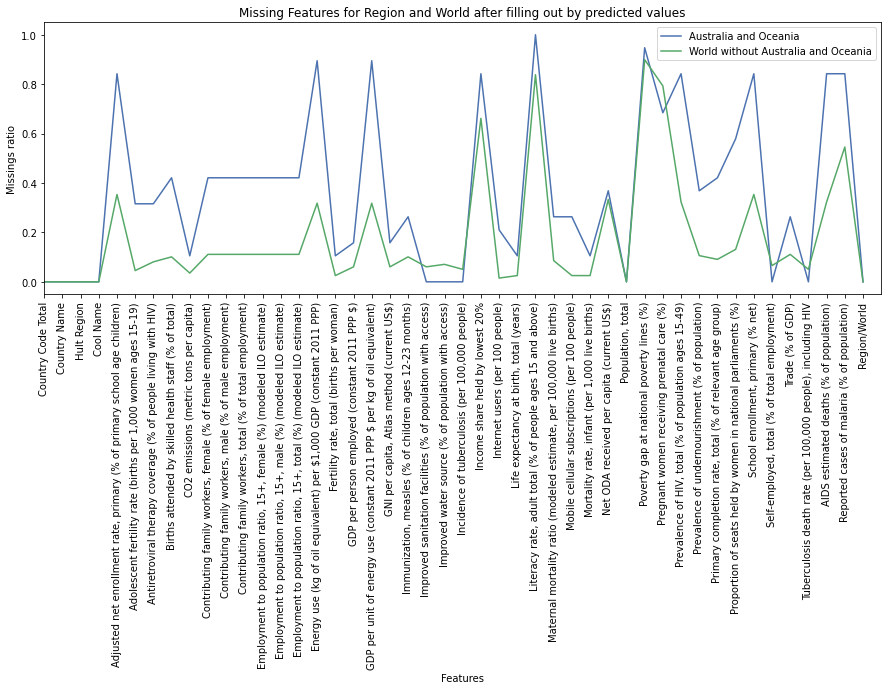

In [37]:
# Comparison of missing values by features 
fig = plt.figure(figsize = (15, 5))
plt.plot(data_region.isnull().mean(), color = "#4C72B0")
plt.plot(data_world.isnull().mean(), color = "#55A868")
plt.xticks(range(data_region.shape[1]), data_region.columns, rotation = 90)
plt.ylabel("Missings ratio", size = 10)
plt.xlabel("Features", size = 10)
plt.legend(labels =  ['Australia and Oceania',
                      'World without Australia and Oceania'])
plt.title('Missing Features for Region and World after filling out by predicted values')
plt.xlim(0, data_region.shape[1]);


In [38]:
# Column 'Literacy rate, adult total (% of people ages 15 and above)' doesn't have any value in
# the dataset for our region. We can't compare it so get rid of this column in both datasets
data_region.drop('Literacy rate, adult total (% of people ages 15 and above)', axis = 1, inplace = True)
data_world.drop('Literacy rate, adult total (% of people ages 15 and above)', axis = 1, inplace = True)

# Final quantities of rows and columns in the region's and the world's data subsets
data_region.shape, data_world.shape


((19, 45), (198, 45))

In [39]:
# # We don't know how to fill it out in the correct way since there is probably no correlation 
# # with other features and there might be no parliaments
# data_region.drop('Proportion of seats held by women in national parliaments (%)', axis=1, inplace=True)
# data_world.drop('Proportion of seats held by women in national parliaments (%)', axis=1, inplace=True)

# data_region.shape, data_world.shape


In [40]:
# List of columns to fill
columns_to_fill = continuous_feature.columns.tolist()

# columns_to_fill.remove('Proportion of seats held by women in national parliaments (%)')
columns_to_fill.remove('Literacy rate, adult total (% of people ages 15 and above)')


In [41]:
# Quantity of missed vlues for each country in the region in entire dataset with adding predicted values
missed_values_region = data_region.isnull().sum(axis = 1).tolist()
missed_values_region


[33, 3, 6, 17, 17, 15, 20, 33, 18, 27, 5, 20, 8, 18, 10, 9, 23, 9, 9]

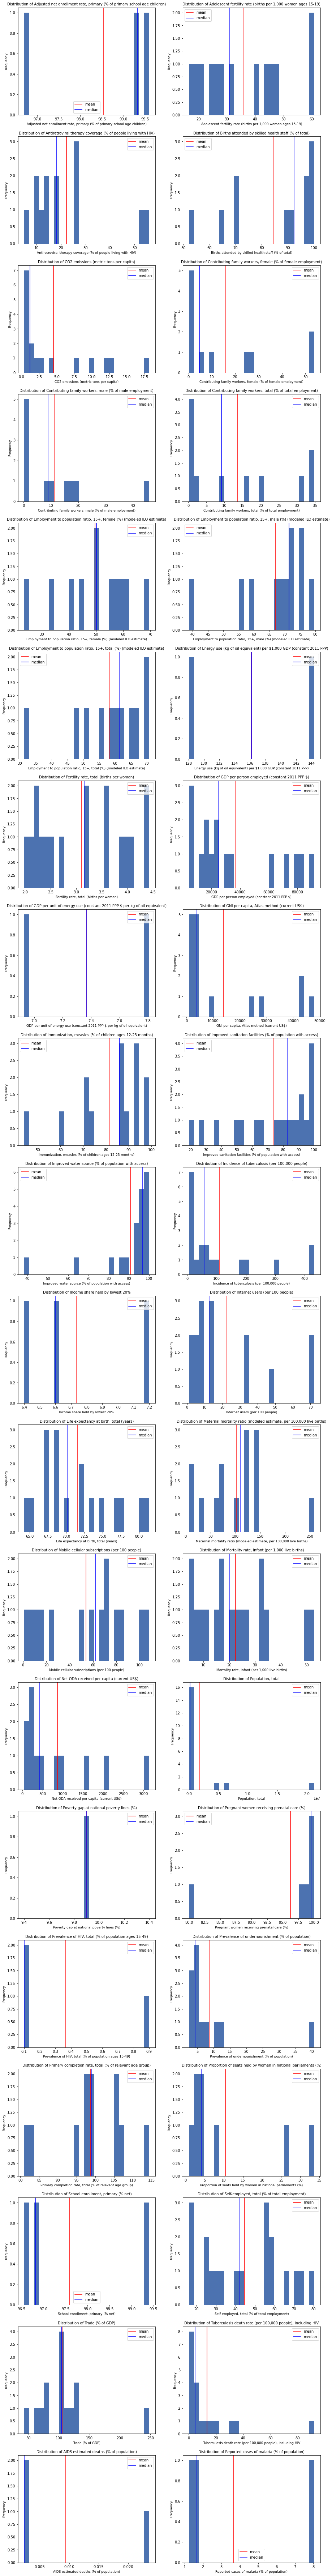

In [42]:
# Checking features values distribution
figures_in_row = 2
count = len(columns_to_fill)
figures_in_col = int(round((count + 0.5), 0) / figures_in_row)

fig, axes = plt.subplots(figures_in_col, figures_in_row, figsize = (15, 130))

for num, feature in enumerate(columns_to_fill):
    y = data_region[feature].copy().dropna()
    axes[num // figures_in_row, num % figures_in_row].hist(y, bins = 25, color = "#4C72B0")
    axes[num // figures_in_row, num % figures_in_row].set_xlabel(feature, fontsize = 9)
    axes[num // figures_in_row, num % figures_in_row].set_ylabel('Frequency', fontsize = 9)
    axes[num // figures_in_row, num % figures_in_row].axvline(x = y.mean(), color = 'red')
    axes[num // figures_in_row, num % figures_in_row].axvline(x = y.median(), color = 'blue')
    axes[num // figures_in_row, num % figures_in_row].legend(labels =  ['mean', 'median'])
    axes[num // figures_in_row, num % figures_in_row].set_title(label = "Distribution of " \
                                                                + feature, fontsize = 10)
    

In [43]:
# Filling missing values of the region's dataset with:
# (to choose the different approach uncomment 
# the other line and comment the current one)
filling_region = "median"
# filling_region = "mean"


In [44]:
# Filling out missing values for the region with medians or means
for col in columns_to_fill:
    
    if filling_region == "median":
        data_region[col] = data_region[col].fillna(data_region[col].median())
        
    elif filling_region == "mean":
        data_region[col] = data_region[col].fillna(data_region[col].mean())
        
    else:
        print("Something went wrong")


In [45]:
# Create lists of median and maximum values for the region

# We will compare countries initial rows with median_values_region, 
# which country has the minimum overall difference is the "average country" 
# of the region if there are enough values in the initial row.

# We will use max_values_region in purpose of normalization so all 
# columns will have similar weight.
median_or_mean_values_region = []
max_values_region = []

for col in columns_to_fill:
    
    if filling_region == "median":
        median_or_mean_values_region.append(data_region[col].median())
        
    elif filling_region == "mean":
        median_or_mean_values_region.append(data_region[col].mean())
        
    else:
        print("Something went wrong")
        
    max_values_region.append(data_region[col].abs().max())


In [46]:
# To compare countries with the median volumes for the region we will use 
# the least squares method additionally using normalization and adding
# weights which reflect quantity of missing values in the initial dataset
# for each country because if too many missing values were replaced with 
# median values, the row for sure will be closer to median values, but 
# it won't reflect the real picture
min_sq_error = 1e+10

for i in range(0, len(data_region)):
                
    sq_error = (sum([((x - y) / z)**2 for x, y, z in zip(data_region.iloc[i, 4 : ], \
                                                         median_or_mean_values_region, max_values_region)])) +\
                                                         missed_values_region[i]

    # print(sq_error.round(decimals=2))
    
    # Country with the lowest sq_error is our "average country"
    if sq_error < min_sq_error: 
        min_sq_error = sq_error
        row_index = i

print(f'\nMinimum sum of weighted square errors = {min_sq_error.round(decimals = 2)}, \
Row index = {row_index}')



Minimum sum of weighted square errors = 6.5, Row index = 2


In [47]:
# The "average country" and its features are:
data_region.iloc[row_index, : ]


Country Code Total                                                                           FJI
Country Name                                                                                Fiji
Hult Region                                                                  Australia & Oceania
Cool Name                                                                            Cliffhanger
Adjusted net enrollment rate, primary (% of primary school age children)                 99.3276
Adolescent fertility rate (births per 1,000 women ages 15-19)                            44.7742
Antiretroviral therapy coverage (% of people living with HIV)                            25.7729
Births attended by skilled health staff (% of total)                                        98.8
CO2 emissions (metric tons per capita)                                                   1.06096
Contributing family workers, female (% of female employment)                              26.232
Contributing family workers, m

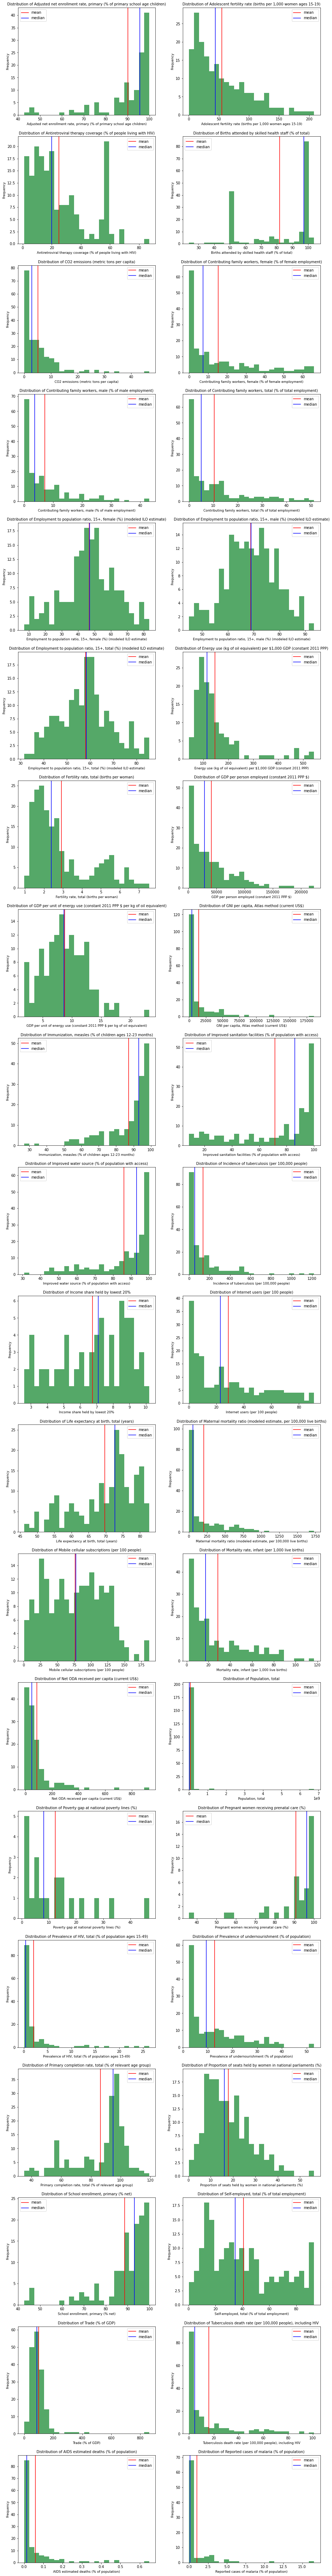

In [48]:
# Checking features values distribution
figures_in_row = 2
count = len(columns_to_fill)
figures_in_col = int(round((count + 0.5), 0) / figures_in_row)

fig, axes = plt.subplots(figures_in_col, figures_in_row, figsize = (15, 130))

for num, feature in enumerate(columns_to_fill):
    y = data_world[feature].copy().dropna()
    axes[num // figures_in_row, num % figures_in_row].hist(y, bins = 25, color = "#55A868")
    axes[num // figures_in_row, num % figures_in_row].set_xlabel(feature, fontsize = 9)
    axes[num // figures_in_row, num % figures_in_row].set_ylabel('Frequency', fontsize = 9)
    axes[num // figures_in_row, num % figures_in_row].axvline(x = y.mean(), color = 'red')
    axes[num // figures_in_row, num % figures_in_row].axvline(x = y.median(), color = 'blue')
    axes[num // figures_in_row, num % figures_in_row].legend(labels =  ['mean', 'median'])
    axes[num // figures_in_row, num % figures_in_row].set_title(label = "Distribution of " \
                                                                + feature, fontsize = 10)
   

In [49]:
# Filling missing values of the world's dataset with:
# (to choose the different approach uncomment 
# the other line and comment the current one)
filling_world = "median"
# filling_world = "mean"


In [50]:
# Filling out missing values for the rest of the world with medians or means
for col in columns_to_fill:
    
    if filling_world == "median":
        data_world[col] = data_world[col].fillna(data_world[col].median())
        
    elif filling_world == "mean":
        data_world[col] = data_world[col].fillna(data_world[col].mean())
        
    else:
        print("Something went wrong")


In [51]:
# Create lists of median and maximum values for the rest of the world
median_or_mean_values_world = []
max_values_world = []

for col in columns_to_fill:
    
    if filling_region == "median":
        median_or_mean_values_world.append(data_world[col].median())
        
    elif filling_region == "mean":
        median_or_mean_values_world.append(data_world[col].mean())
        
    else:
        print("Something went wrong")
        
    max_values_world.append(data_world[col].abs().max())
    

In [52]:
# Compare "average country" of the region with the list of the rest of the world median values
diff = \
[((x - y) / z) for x, y, z in \
 zip(data_region.iloc[row_index, 4 : ], median_or_mean_values_world, max_values_world)]


In [53]:
# Create list of indexes
indexes = [i for i in range(4, 4 + len(diff))]


In [54]:
# Create DataFrame with indexes and differences and sort it
difference = pd.DataFrame(diff, index = indexes, columns = ['difference'])
sorted_list = difference.abs().sort_values(by = 'difference', ascending = False).index.tolist()


In [55]:
# Print the list of n features wich differ most with its values for the region and the rest of the world
n = 5

i = 0

for index in sorted_list:
    print(f"""Feature: {columns_to_fill[index - 4]}: \nTypical for {data_region.iloc[row_index, 2]} \
({data_region.iloc[row_index, 1]}) {round(data_region.iloc[row_index, index], 1)}, \
{filling_world} for the World {round(max_values_world[index - 4], 1)}\n""")
    
    i += 1
    
    if i == n:
        break
        

Feature: Contributing family workers, female (% of female employment): 
Typical for Australia & Oceania (Fiji) 26.2, median for the World 66.0

Feature: Proportion of seats held by women in national parliaments (%): 
Typical for Australia & Oceania (Fiji) 4.0, median for the World 56.3

Feature: Contributing family workers, total (% of total employment): 
Typical for Australia & Oceania (Fiji) 15.6, median for the World 51.3

Feature: Employment to population ratio, 15+, female (%) (modeled ILO estimate): 
Typical for Australia & Oceania (Fiji) 33.3, median for the World 83.3

Feature: Contributing family workers, male (% of male employment): 
Typical for Australia & Oceania (Fiji) 10.5, median for the World 43.1

